<a href="https://colab.research.google.com/github/jovian-explorer/BBbarolo/blob/main/Rotation_curve_fitting_using_HI_spectral_cube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


I have used my github profile to upload data, instead of going through the hassle of mounting the drive, or uploading the files each time.

https://github.com/jovian-explorer

####Importing Libraries

In [14]:
#importing necessary packages
import numpy as np
from astropy.io import fits as f
import pandas as pd
from astropy.table import Table as t
import matplotlib.colors as mpl
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
import plotly.express as px
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit
import scipy.optimize as so
import warnings
warnings.filterwarnings("ignore")

####Importing data

#####NGC2403.FITS

In [15]:
#downloading and opening the data file
fname= download_file('https://github.com/jovian-explorer/BBbarolo/blob/main/ngc2403.fits?raw=true',cache=True)
aa = f.open(fname,memap=True)

In [16]:
#displaying the info in the file
aa.info()

Filename: /root/.astropy/cache/download/url/ebbedf398caa205bbe2f5573b7201ca5/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1132   (150, 150, 62)   float32   


In [17]:
dataset = aa['PRIMARY'].data

In [18]:
print(dataset.ndim)  #dimensions of the data

3


In [19]:
print(dataset.shape) #SHAPE

(62, 150, 150)


#####RINGLOG1

In [20]:
url_1 = 'https://raw.githubusercontent.com/jovian-explorer/BBbarolo/main/ringlog1.csv'     # link to the raw file for the dataset from my github
ringlog1 = pd.read_csv(url_1,encoding='utf-8')
ringlog1.columns = ["#RAD_PIX","RAD_arcs","VROT_km/s","DISP_km/s","INC_deg","PA_deg_","Z0_pc","Z0_arcs","SIG_E20","X_POS_pix","Y_POS_pix","V_SYS_km/s","V_RAD_km/s"]
print(ringlog1.head())

   #RAD_PIX  RAD_arcs  VROT_km/s  DISP_km/s  INC_deg  PA_deg_    Z0_pc  \
0     0.233        15     45.171     23.418       60  114.590  155.144   
1     0.698        45     61.615     22.368       60  133.569  155.144   
2     1.164        75     76.511     17.979       60  124.363  155.144   
3     1.629       105     83.943     16.476       60  133.862  155.144   
4     2.094       135     88.821     15.329       60  119.017  155.144   

   Z0_arcs  SIG_E20  X_POS_pix  Y_POS_pix  V_SYS_km/s  V_RAD_km/s  
0       10        1         77         77       132.8           0  
1       10        1         77         77       132.8           0  
2       10        1         77         77       132.8           0  
3       10        1         77         77       132.8           0  
4       10        1         77         77       132.8           0  


#####RINGLOG2

In [67]:
url_2 = 'https://raw.githubusercontent.com/jovian-explorer/BBbarolo/main/ringlog2.csv'     # link to the raw file for the dataset from my github
ringlog2= pd.read_csv(url_2,encoding='utf-8')
ringlog2.columns = ["#RAD_PIX","RAD_arcs","VROT_km/s","DISP_km/s","INC_deg","PA_deg_","Z0_pc","Z0_arcs","SIG_E20","X_POS_pix","Y_POS_pix","V_SYS_km/s","V_RAD_km/s"]
v_rot= ringlog2["VROT_km/s"]
rad = ringlog2["RAD_arcs"]
print(ringlog2.head()) 

   #RAD_PIX  RAD_arcs  VROT_km/s  DISP_km/s  INC_deg  PA_deg_    Z0_pc  \
0     0.233        15     45.171     23.418       60  114.590  155.144   
1     0.698        45     66.765     21.267       60  124.741  155.144   
2     1.164        75     76.288     18.098       60  126.844  155.144   
3     1.629       105     85.292     15.984       60  126.303  155.144   
4     2.094       135     91.521     14.703       60  125.005  155.144   

   Z0_arcs  SIG_E20  X_POS_pix  Y_POS_pix  V_SYS_km/s  V_RAD_km/s  
0       10        1         77         77       132.8           0  
1       10        1         77         77       132.8           0  
2       10        1         77         77       132.8           0  
3       10        1         77         77       132.8           0  
4       10        1         77         77       132.8           0  


####Brandt profile curvefit

In [66]:
v_rot= ringlog2["VROT_km/s"]
print(max(v_rot))
rad = ringlog2["RAD_arcs"]
print(rad[36])
print(np.where(v_rot == 136.865))

136.865
1095
(array([36]),)


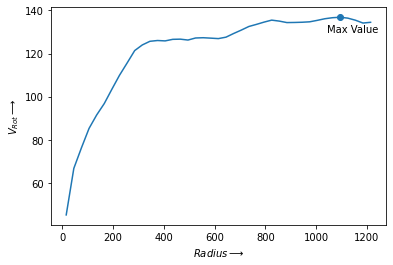

In [23]:
vmax = max(v_rot)
rmax = rad[36]
plt.plot(rad,v_rot)
plt.scatter(rmax,vmax)
plt.text(rmax-50,vmax -7 ,"Max Value")
plt.xlabel("$Radius \longrightarrow$")
plt.ylabel("$V_{Rot} \longrightarrow $")
plt.show()

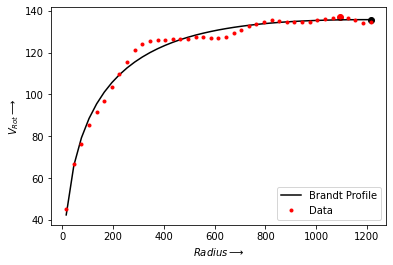

In [88]:
def func1(R_max,V_max,n):
  numerator = V_max*(1200/R_max)
  denominator = ((1/3)+ ((2/3)*((1200/R_max)**n)))**(3/(2*n))
  return numerator/denominator
   
popt1, pcov1 = curve_fit(func1,rad, v_rot)
plt.plot(rad, func1(rad, *popt1), 'k-', label="Brandt Profile")
plt.scatter(1215,135.718087212856,color = 'black')

plt.plot(rad, v_rot, 'r.', label="Data")
plt.scatter(rmax,vmax,color = 'red')

plt.xlabel("$Radius \longrightarrow$")
plt.ylabel("$V_{Rot} \longrightarrow $")
plt.legend()
plt.show()

In [102]:
# parameters obtained from the Brandt profile curvefit
R_max = 1215
V_max =135.719

In [131]:
print("                _________________________________________")
print("                | "+ " Max Velocity" +"   |      "+"Max Radius" +"     |")
print("________________|_________________|_____________________|")
print("Data" +"            |     "+str(vmax) + "     |          "+ str(rmax) +"       |")
print("________________|_________________|_____________________|")
print("Brandt Profile"+"  |     " +str(V_max) + "     |          "+ str(R_max) +"       |")
print("________________|_________________|_____________________|")

                _________________________________________
                |  Max Velocity   |      Max Radius     |
________________|_________________|_____________________|
Data            |     136.865     |          1095       |
________________|_________________|_____________________|
Brandt Profile  |     135.719     |          1215       |
________________|_________________|_____________________|


#####DENSITY PROFILE

In [ ]:
url_3 = 'https://raw.githubusercontent.com/jovian-explorer/BBbarolo/main/densprof.csv'     # link to the raw file for the dataset from my github
densprof = pd.read_csv(url_3,encoding='utf-8')
densprof.columns = ["RADIUS","SUM","MEAN","MEDIAN","STDDEV","MAD","NPIX","ERR_SD","SURFDENS_FO","SURFDENS","MSURFDENS","MSURFDENS2"]
print(densprof.head()) #displaying the first 5 rows

# Columns 2-6  : ring stats (sum, mean, median, standard deviation and median absolute deviation from the median).
# Column  7    : number of pixels within the ring.
# Columns 8-10 : surface density, its error and face-on surface density (inclination corrected).
# Columns 11-12: face-on (inclination corrected) mass surface densities with two different techniques.

##This is not a part of the actual assignment, but since I was playing around with the fits file, I thought of sharing it as well.


#### Trying some plotting

#####2D plots

In [ ]:
#plotting a histogram of the values
e=plt.hist(dataset[0],bins='auto')
plt.xlabel("dataset[0]")
plt.ylabel("Counts")
plt.show()

q=plt.hist(dataset[1],bins='auto')
plt.xlabel("dataset[1]")
plt.ylabel("Counts")
plt.show()

g=plt.hist(dataset[2],bins='auto')
plt.xlabel("dataset[2]")
plt.ylabel("Counts")
plt.show()

In [ ]:
plt.scatter(dataset[0],dataset[1],c=dataset[2],cmap='viridis')

#####3D plots

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(dataset[0],dataset[1],dataset[2],c=dataset[2],cmap='viridis')
# show plot
plt.title("Galaxy NGC2403") #atleast that's what it looks like, to me
plt.show()

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
x = dataset[0]
y = dataset[1]
z = dataset[2]
ax.plot_surface(x,y,z)
# show plot
plt.show()

####Finally, some simple calulations

In [ ]:
#Printing the minimum, maximum and mean values of the pixels
print("Min: "+str(np.min(dataset)))
print("Max: "+str(np.max(dataset)))
print("Mean: "+str(np.mean(dataset)))
#Displaying the location of the central (also the brightest) pixel
m=np.max(dataset)
print("Position of the brightest central pixel is: ",np.where(dataset==m))